# Libraries

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

# EDA

In [11]:
df = pd.read_csv(r'C:\Users\Hibatullah\CA\DL\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df['avrage_score'] = (df['math score']+ df['reading score'] + df['writing score']) /3
df ['final score'] = df['avrage_score'].apply(lambda x:1 if x >=50 else 0)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avrage_score,final score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1


In [13]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'avrage_score', 'final score'],
      dtype='object')

In [14]:
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course' ]
num_col = ['math score', 'reading score', 'writing score']

selected_col = cat_cols + num_col

X = df.drop(['final score','avrage_score' ], axis=1, errors='ignore')
y = df['final score']

In [15]:
print("orginal data shape:", X.shape)
print("categorical columns:", cat_cols)
print("numerical columns:", num_col)
print("features:", selected_col)

orginal data shape: (1000, 8)
categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical columns: ['math score', 'reading score', 'writing score']
features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [16]:
X_encode = pd.get_dummies(X, columns=cat_cols, prefix=cat_cols, drop_first=False)
print("\nAfter one-hot encoding shape:", X_encode.shape)
print("Feature columns after encoding:", list(X_encode.columns))


After one-hot encoding shape: (1000, 20)
Feature columns after encoding: ['math score', 'reading score', 'writing score', 'gender_female', 'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', "parental level of education_associate's degree", "parental level of education_bachelor's degree", 'parental level of education_high school', "parental level of education_master's degree", 'parental level of education_some college', 'parental level of education_some high school', 'lunch_free/reduced', 'lunch_standard', 'test preparation course_completed', 'test preparation course_none']


In [17]:
scaler = StandardScaler()
X_encode[num_col] = scaler.fit_transform(X_encode[num_col])
print("\nNumerical features normalized")
print("Final preprocessed data shape:", X_encode.shape)


Numerical features normalized
Final preprocessed data shape: (1000, 20)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTrain set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")



Train set shape: (800, 20)
Test set shape: (200, 20)


# Day 1 practice in DL

## Basic of NN with scikit- learn

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [40]:
def plot_decision_boundary(clf, X, y, ax=None, title=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    if title:
        ax.set_title(title)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Single-layer networks:

[10] → 1 hidden layer with 10 neurons (simple architecture)

[50] → 1 hidden layer with 50 neurons (moderate complexity)

[100] → 1 hidden layer with 100 neurons (deeper representation)

Multi-layer networks:

[(]50, 30] → 2 hidden layers with 50 and 30 neurons respectively

[100, 50, 25] → 3 hidden layers with decreasing neuron counts (useful for feature refinement)

[200, 100, 50] → A deep network with gradually decreasing layer sizes

Deeper setups:

[500, 250, 100]

[10, 10, 10, 10, 10]

[1024, 512, 256, 128, 64] → Used for large-scale problems with high-dimensional data

Training:simple_na - Architecture: [10]


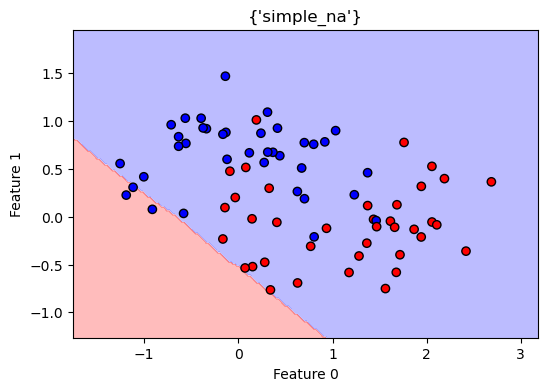

Training:moderate_na - Architecture: [50]


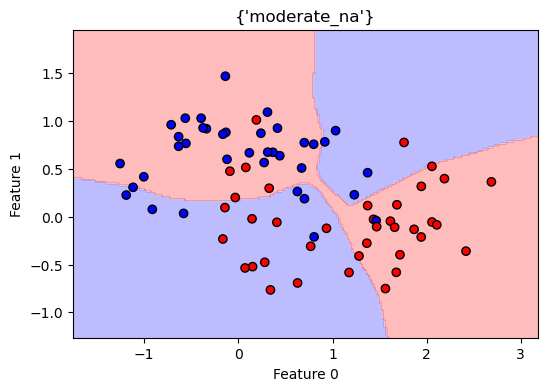

Training:deeper_na - Architecture: [100]


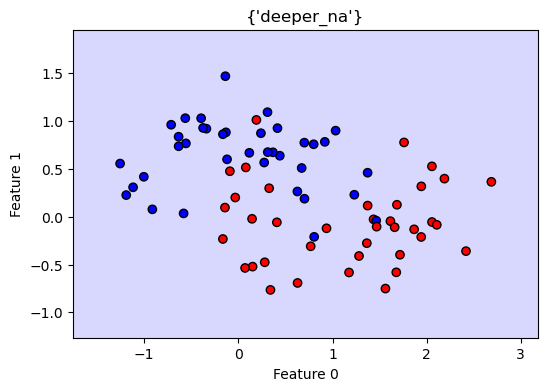

Training:2_layer - Architecture: [50, 30]


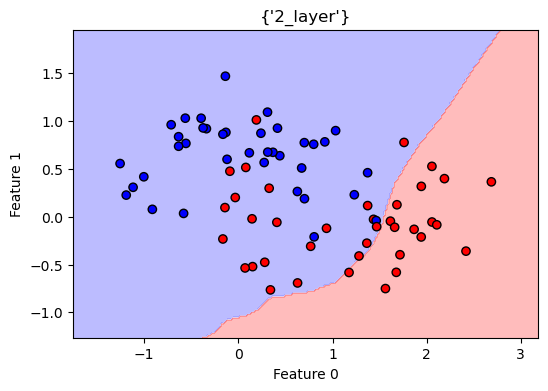

Training:3_layer - Architecture: [100, 50, 25]


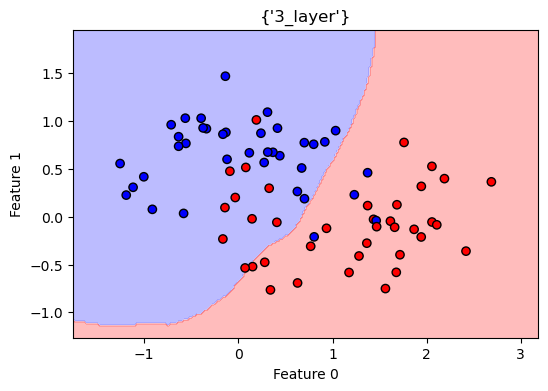

Training:3deep_layer - Architecture: [200, 100, 50]


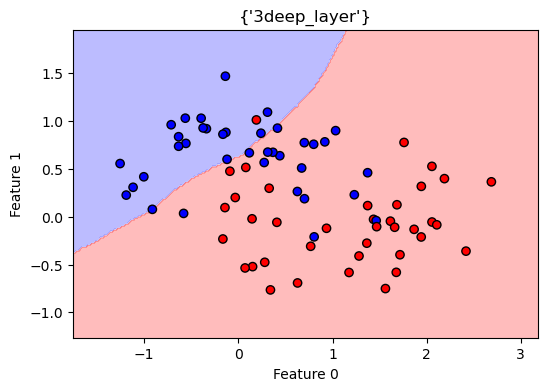

Training:31deep_layer - Architecture: [500, 250, 100]


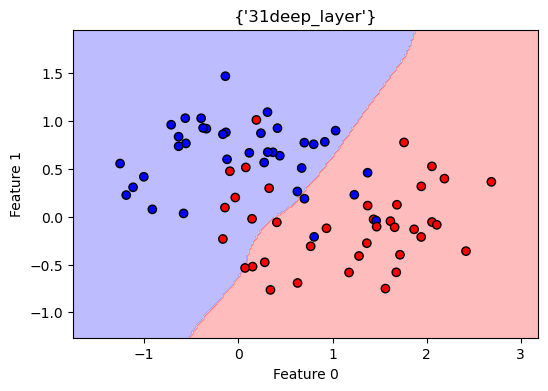

Training:5_layer - Architecture: [10, 10, 10, 10, 10]


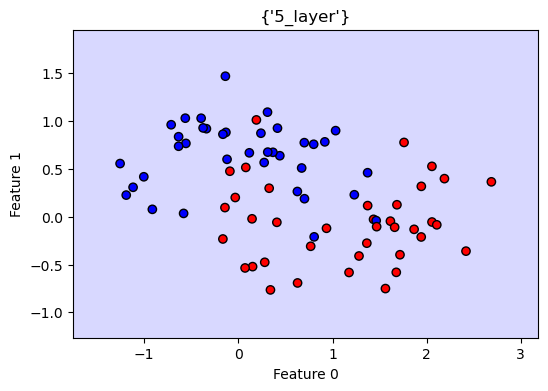

Training:5deep_layer - Architecture: [1024, 512, 256, 128, 64]


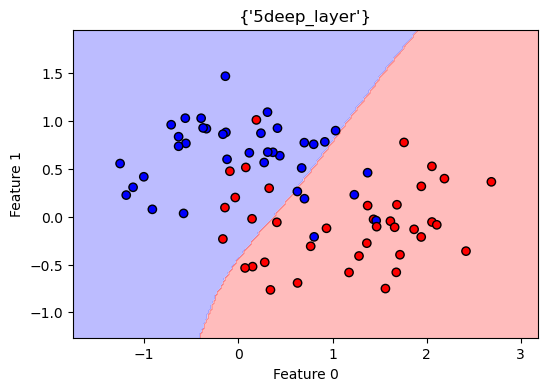

In [42]:
arch = {
    "simple_na": [10],
    "moderate_na": [50],
    "deeper_na": [100],
    "2_layer": [50, 30],
    "3_layer": [100, 50, 25],
    "3deep_layer": [200, 100, 50],
    "31deep_layer": [500, 250, 100],
    "5_layer": [10, 10, 10, 10, 10],
    "5deep_layer": [1024, 512, 256, 128, 64]
}

for i, (name, hidden_layers) in enumerate(arch.items()):
    print(f"Training:{name} - Architecture: {hidden_layers}")

    mlp = MLPClassifier (hidden_layer_sizes=hidden_layers, max_iter=1000, solver='adam', 
                         random_state=42, alpha=0.01, early_stopping=True)
    mlp.fit (X_train, y_train)
    plt.figure(figsize=(6,4))
    plot_decision_boundary( mlp, X_train, y_train, title={name})
    plt.show()

In [51]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Dict to store outputs
out_dict = {}

arch = {
    "simple_na": [10],
    "moderate_na": [50],
    "deeper_na": [100],
    "2_layer": [50, 30],
    "3_layer": [100, 50, 25],
    "3deep_layer": [200, 100, 50],
    "31deep_layer": [500, 250, 100],
    "5_layer": [10, 10, 10, 10, 10],
    "5deep_layer": [1024, 512, 256, 128, 64]
}

# Training loop
for name, hidden_layers in arch.items():
    print(f"Training: {name} - {hidden_layers}")
    
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        max_iter=1000,
        solver='adam',
        random_state=42,
        alpha=0.01,
        early_stopping=True
    )
    mlp.fit(X_train, y_train)
    
    # Save model and loss curve
    out_dict[name] = {
        'model': mlp,
        'loss_curve': mlp.loss_curve_
    }


Training: simple_na - [10]
Training: moderate_na - [50]
Training: deeper_na - [100]
Training: 2_layer - [50, 30]
Training: 3_layer - [100, 50, 25]
Training: 3deep_layer - [200, 100, 50]
Training: 31deep_layer - [500, 250, 100]
Training: 5_layer - [10, 10, 10, 10, 10]
Training: 5deep_layer - [1024, 512, 256, 128, 64]


In [50]:
arch = {
    "simple_na": [10],
    "moderate_na": [50],
    "deeper_na": [100],
    "2_layer": [50, 30],
    "3_layer": [100, 50, 25],
    "3deep_layer": [200, 100, 50],
    "31deep_layer": [500, 250, 100],
    "5_layer": [10, 10, 10, 10, 10],
    "5deep_layer": [1024, 512, 256, 128, 64]
}

out_dict[name] = {
    'model' : mlp,
    'loss_curve' : mlp.loss_curve_,
    'iterations' : mlp.n_iter_
}

for i, (name, hidden_layers) in enumerate(arch.items()):
    print(f"Training:{name} - Architecture: {hidden_layers}")

    mlp = MLPClassifier (hidden_layer_sizes=hidden_layers, max_iter=1000, solver='adam', 
                         random_state=42, alpha=0.01, early_stopping=True)
    mlp.fit (X_train, y_train)

    print(f"{name} : {mlp.n_iter_} : {mlp.loss_curve_}")
    

Training:simple_na - Architecture: [10]
simple_na : 12 : [0.8834509694904934, 0.8808033220902662, 0.8781626281653168, 0.8755140210896811, 0.8728831513684921, 0.8702528815658069, 0.8676264676428472, 0.8649970294217129, 0.8623686251716979, 0.8597511154748438, 0.8571588903762254, 0.8545762467142176]
Training:moderate_na - Architecture: [50]
moderate_na : 14 : [0.73810520547259, 0.7346380708866196, 0.731213007489758, 0.7278211528924673, 0.7244501527177357, 0.7211016988270952, 0.7177806658805359, 0.714465478872945, 0.711170740362457, 0.7079002369423031, 0.7046376181020697, 0.7013954483958351, 0.6981699311057595, 0.6949667668861531]
Training:deeper_na - Architecture: [100]
deeper_na : 12 : [0.7876547277139957, 0.7801240341676056, 0.7726880298364219, 0.7653483089604717, 0.7580993899764279, 0.7509470168904464, 0.7438794271675807, 0.7369112711368047, 0.7300218604572832, 0.7232143344884774, 0.7164929745716564, 0.7098692538351904]
Training:2_layer - Architecture: [50, 30]
2_layer : 26 : [0.711398

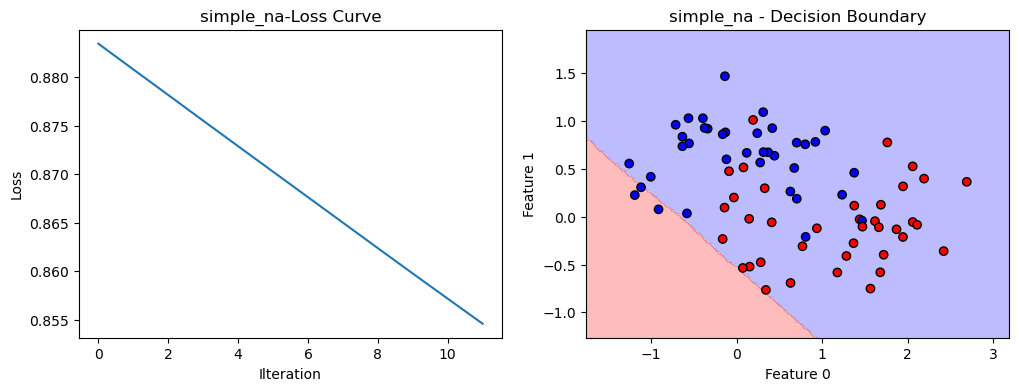

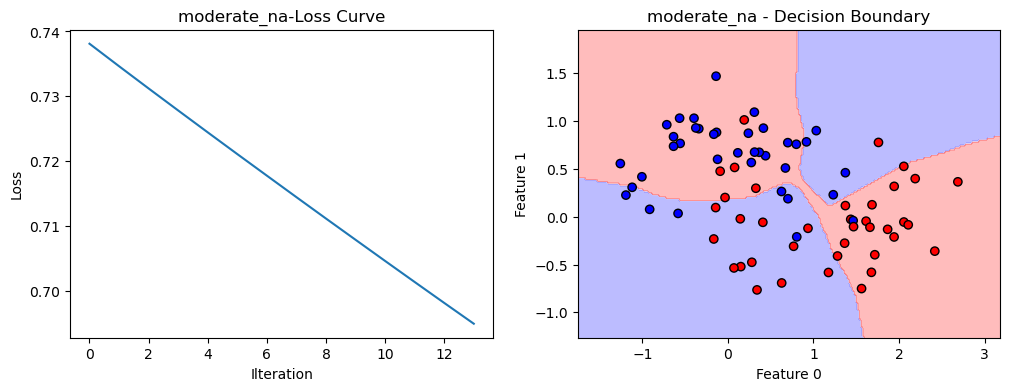

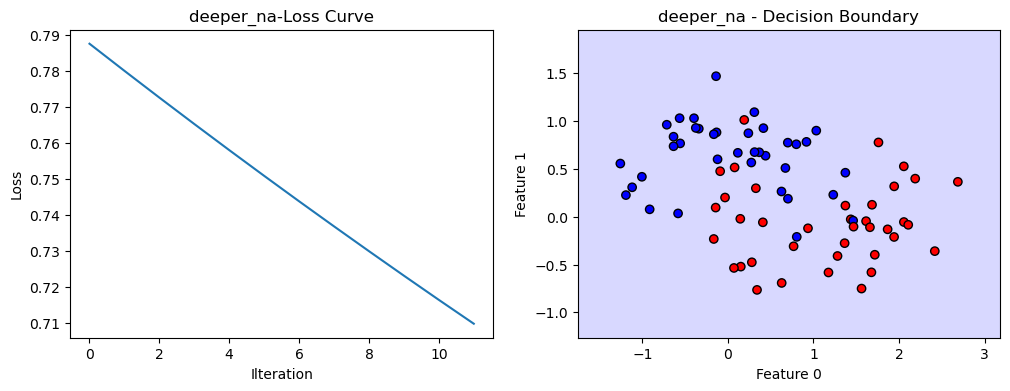

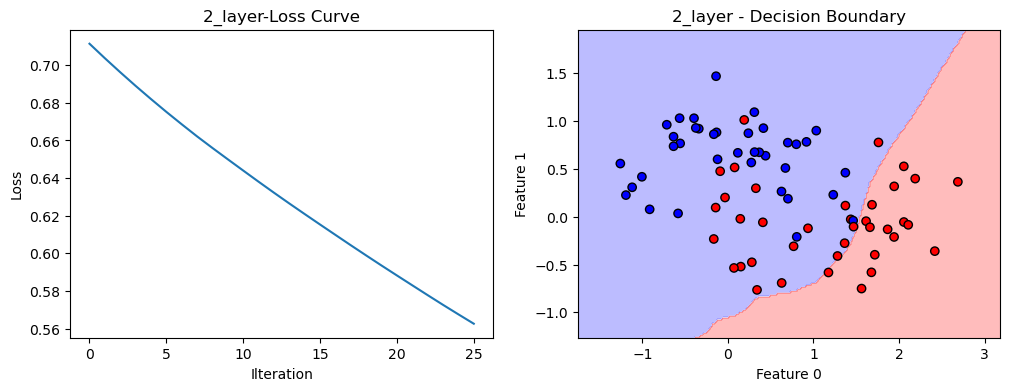

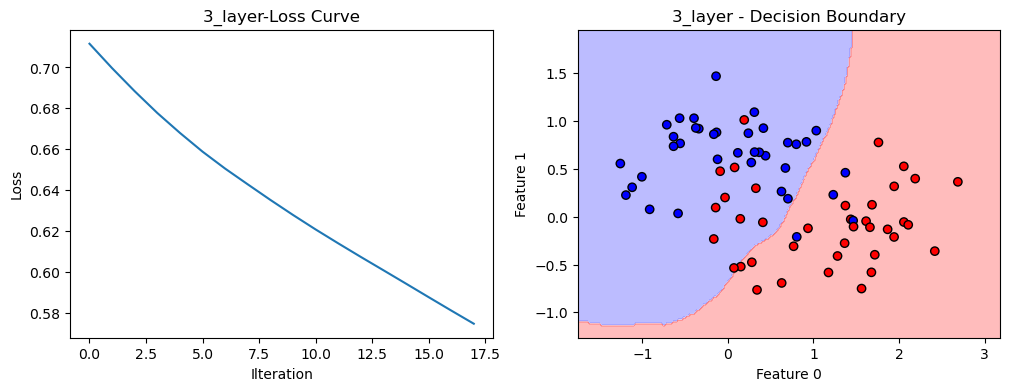

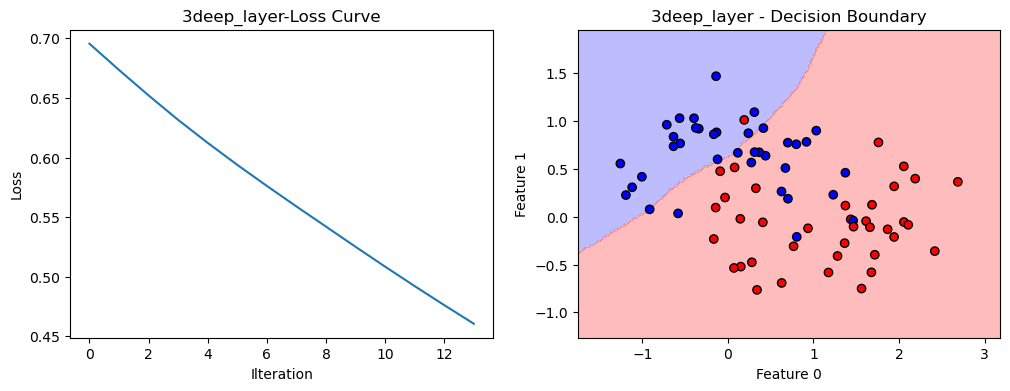

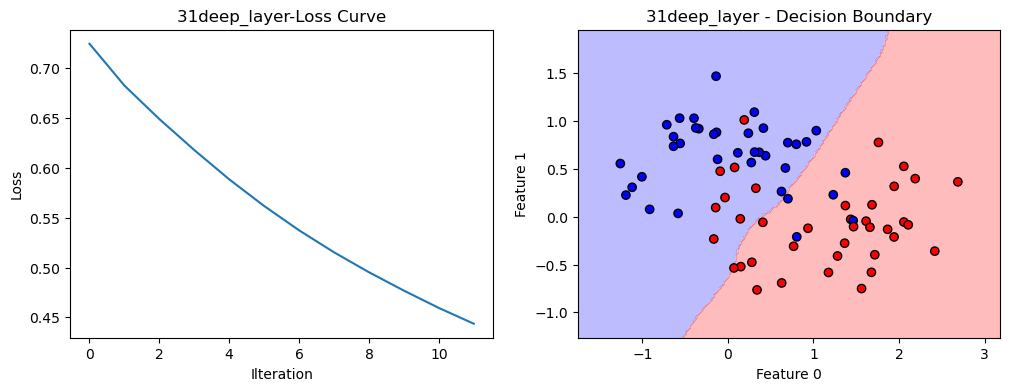

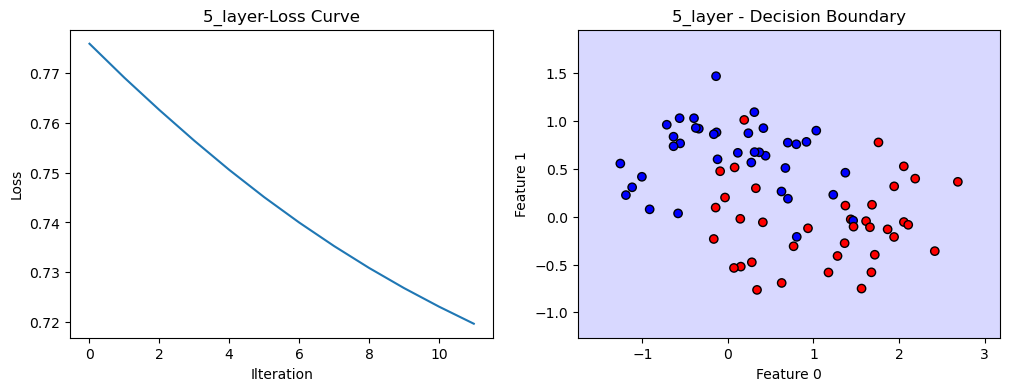

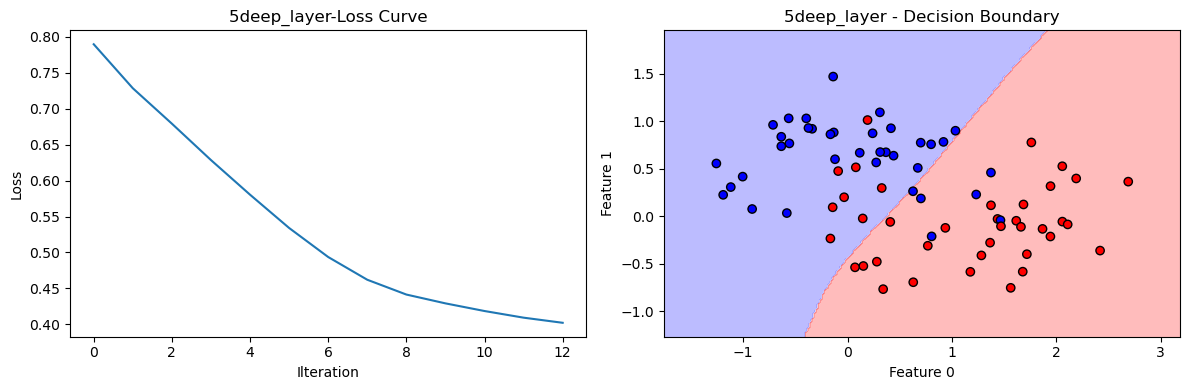

In [52]:
for i, (name, hidden_layers) in enumerate (arch.items()):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    #loss curve graph
    axs[0].plot(out_dict[name]['loss_curve'])
    axs[0].set_title(f"{name}-Loss Curve")
    axs[0].set_xlabel("Ilteration")
    axs[0].set_ylabel("Loss")

    #mlp graph
    if X_train.shape[1] == 2:
        plot_decision_boundary(out_dict[name]['model'], X_train, y_train, title=f"{name} - Decision Boundary", ax=axs[1])
    else:
        axs[1].text(0.5, 0.5, "Only for 2D inputs", ha='center', va='center')
        axs[1].set_title(f"{name} - Decision Boundary")
        axs[1].axis('off')
plt.tight_layout()
plt.show()